# Color extraction-Scikit Learn

###  We'll see how simple it is to identify the most important colors in an image using the K Means, unsupervised ML model from the Scikit Learn package.


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:

def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [3]:
PATH = '/home/ahmed/Downloads/img_lights.jpg'
WIDTH = 128
HEIGHT = 128
CLUSTERS = 12

In [4]:
image = Image.open(PATH)

In [5]:
image.size

(600, 400)

In [6]:
print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH) / 1024, d=image.size))

Loaded JPEG image. Size: 19.98 KB. Dimensions: ((600, 400))


In [7]:
def color_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [8]:
color_new_size(image)

(128, 85)

In [9]:
new_width, new_height = color_new_size(image)

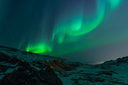

In [10]:
image.resize((new_width, new_height), Image.ANTIALIAS)



In [11]:
img_array = np.array(image)

img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))



In [12]:
model = KMeans(n_clusters=CLUSTERS)

labels = model.fit_predict(img_vector)

label_counts = Counter(labels)

total_count = sum(label_counts.values())



In [13]:
hex_colors = [
    rgb2hex(center) for center in model.cluster_centers_
]
hex_colors


['#09201d',
 '#2c696e',
 '#00b47b',
 '#022f37',
 '#040c0d',
 '#01bc35',
 '#4d6368',
 '#093e42',
 '#068984',
 '#244c59',
 '#04634b',
 '#028462']

In [14]:
list(zip(hex_colors, list(label_counts.values())))

[('#09201d', 37075),
 ('#2c696e', 51204),
 ('#00b47b', 17421),
 ('#022f37', 29360),
 ('#040c0d', 8802),
 ('#01bc35', 9024),
 ('#4d6368', 11179),
 ('#093e42', 16474),
 ('#068984', 9446),
 ('#244c59', 14025),
 ('#04634b', 2909),
 ('#028462', 33081)]

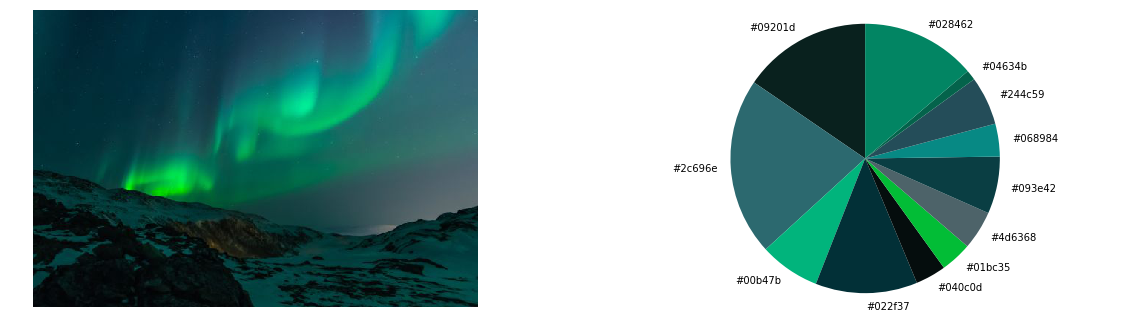

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()